In [2]:
import pandas as pd
import numpy as np
import plotly.express as px



import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline

In [3]:
df = pd.read_csv('../../Data/complete_fire.csv')

In [4]:
df.head()

,unique_fire_identifier,lattitude,longitude,acres_burned,fire_cause,incident_name,IsFSAssisted,origin_county,state,year,...,area (acres),population,d0,d1,d2,d3,d4,DSCI_avg,DSCI_summed,precipitation(in)
0,2003-WYCMX-200237,-105.563067,44.603340,139.091837,Unknown,SCHWARTZ,1.0,Campbell,WY,2003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-CABDU-006784,-117.076679,34.733894,1906.698008,Unknown,MENTONE,1.0,San Bernardino,CA,2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-IDGBK-000002,-116.216680,43.666673,685.728842,Unknown,NIFC RAMP SUPPORT,1.0,Ada,ID,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-IDCTF-008902,-111.426912,42.096336,20.000000,Unknown,St. Charles RX,0.0,Bear Lake,ID,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-AZPNF-000975,-112.072414,34.598306,77.946287,Unknown,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

unique_fire_identifier        0
lattitude                     0
longitude                     0
acres_burned                  0
fire_cause                    0
incident_name                 0
IsFSAssisted                  0
origin_county                 0
state                         0
year                          0
month                         0
value                     40987
anomaly                   40987
area (acres)              39756
population                39756
d0                        34889
d1                        34889
d2                        34889
d3                        34889
d4                        34889
DSCI_avg                  34889
DSCI_summed               34889
precipitation(in)         42654
dtype: int64

In [6]:
# df = df.dropna()

In [7]:
df.isnull().sum()

unique_fire_identifier        0
lattitude                     0
longitude                     0
acres_burned                  0
fire_cause                    0
incident_name                 0
IsFSAssisted                  0
origin_county                 0
state                         0
year                          0
month                         0
value                     40987
anomaly                   40987
area (acres)              39756
population                39756
d0                        34889
d1                        34889
d2                        34889
d3                        34889
d4                        34889
DSCI_avg                  34889
DSCI_summed               34889
precipitation(in)         42654
dtype: int64

In [8]:
df = df.drop(columns = ['incident_name'])

In [9]:
df.head()

,unique_fire_identifier,lattitude,longitude,acres_burned,fire_cause,IsFSAssisted,origin_county,state,year,month,...,area (acres),population,d0,d1,d2,d3,d4,DSCI_avg,DSCI_summed,precipitation(in)
0,2003-WYCMX-200237,-105.563067,44.603340,139.091837,Unknown,1.0,Campbell,WY,2003,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-CABDU-006784,-117.076679,34.733894,1906.698008,Unknown,1.0,San Bernardino,CA,2004,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-IDGBK-000002,-116.216680,43.666673,685.728842,Unknown,1.0,Ada,ID,2008,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-IDCTF-008902,-111.426912,42.096336,20.000000,Unknown,0.0,Bear Lake,ID,2008,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-AZPNF-000975,-112.072414,34.598306,77.946287,Unknown,0.0,Yavapai,AZ,2008,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

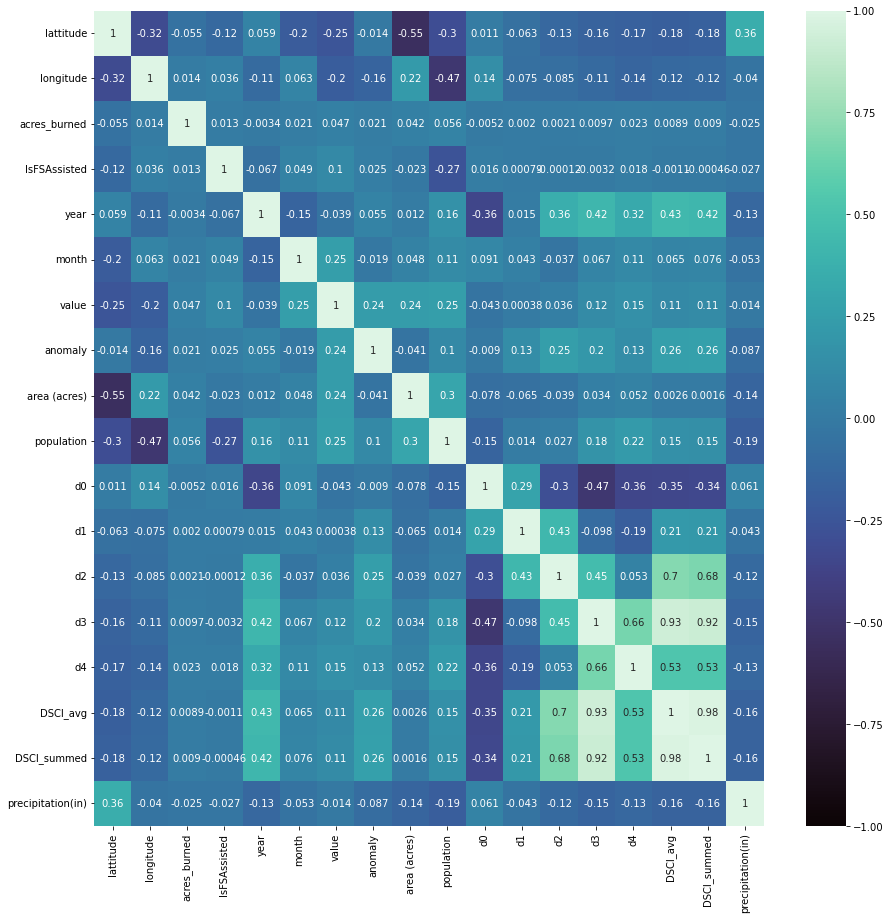

In [10]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True, cmap = 'mako', vmin = -1, vmax = 1)

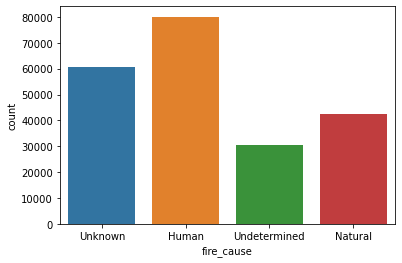

In [11]:
sns.countplot(x='fire_cause', data = df);

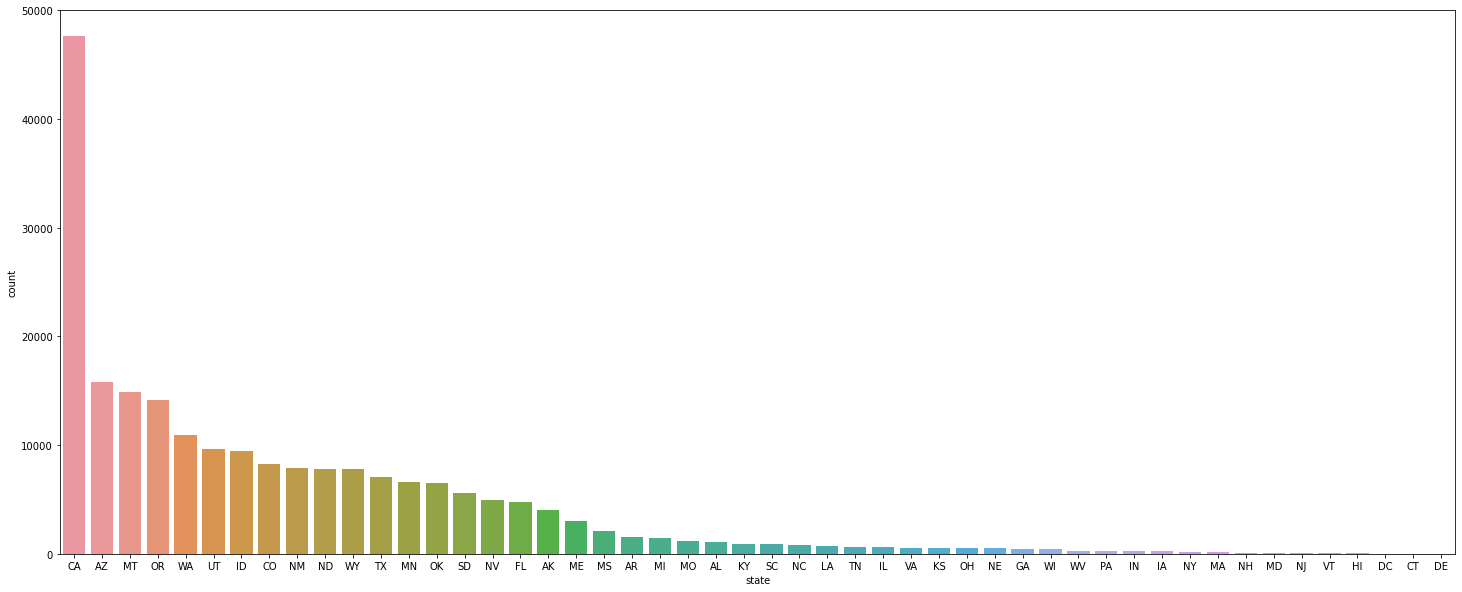

In [28]:
plt.figure(figsize = (25,10))
sns.countplot(x='state', data=df, order = df['state'].value_counts().index);

<AxesSubplot:xlabel='state', ylabel='acres_burned'>

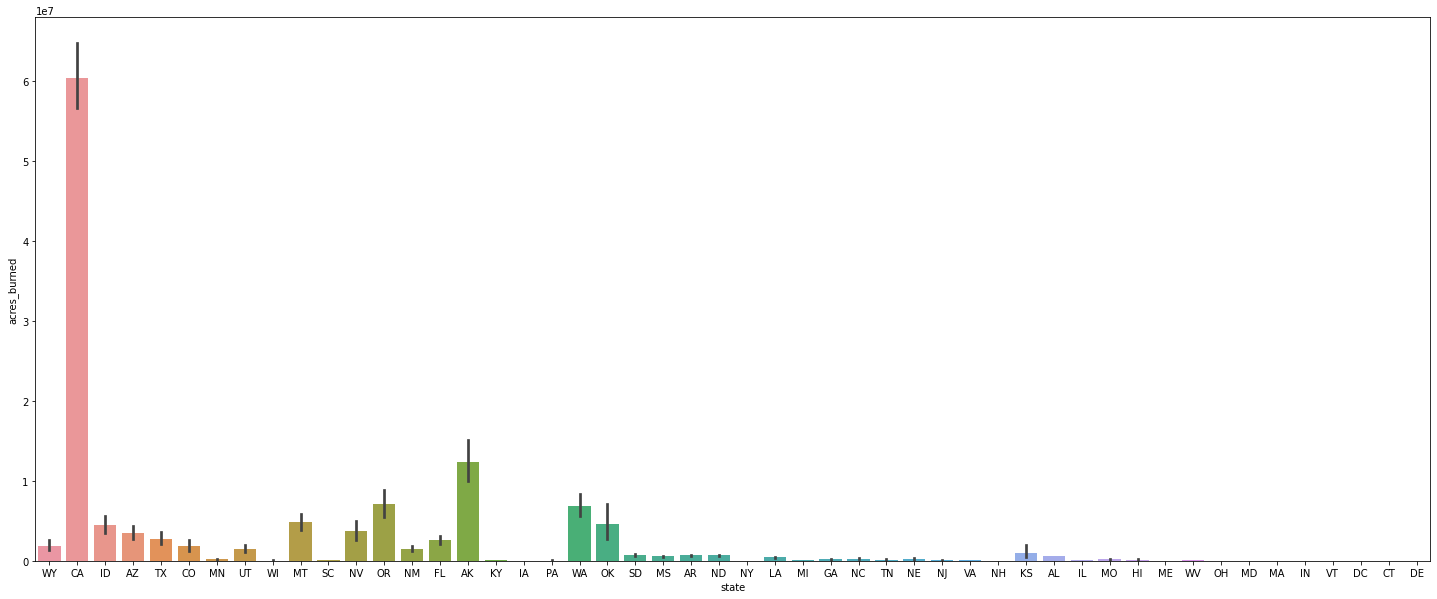

In [32]:
plt.figure(figsize=(25,10))
sns.barplot(x='state', y='acres_burned', data = df, estimator = np.sum, )

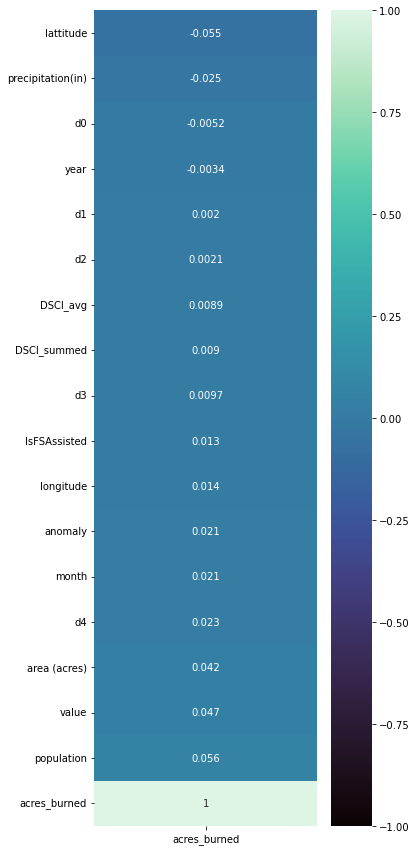

In [15]:
plt.figure(figsize = (5,15))
sns.heatmap(df.corr()[['acres_burned']].sort_values('acres_burned', ascending=True), annot = True, cmap = 'mako', vmin = -1, vmax = 1);

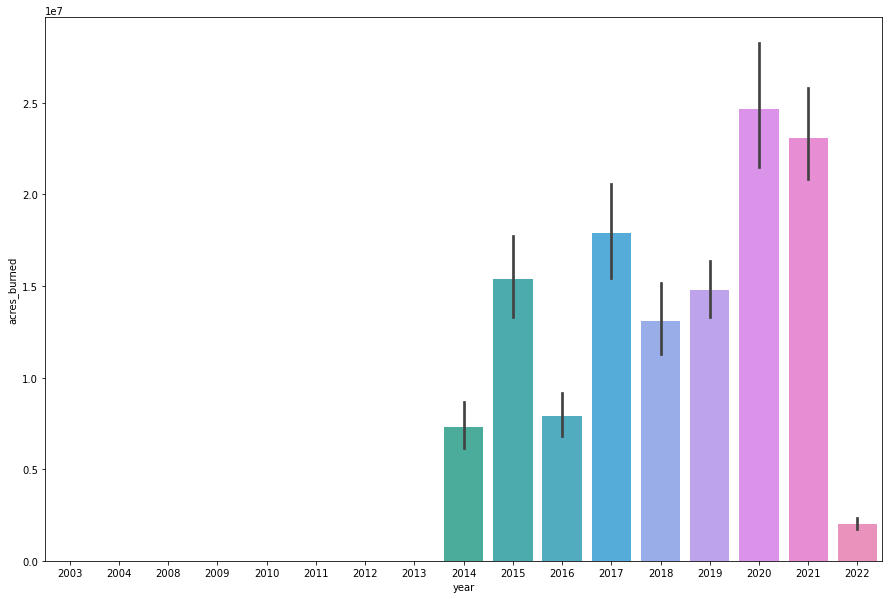

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x='year', y='acres_burned', data = df, estimator = np.sum);

In [17]:
conditions = [df['acres_burned'] < .25,
             (df['acres_burned'] > .25) & (df['acres_burned'] < 9.9),
             (df['acres_burned'] > 9.9) & (df['acres_burned'] < 99.99),
             (df['acres_burned'] > 99.99) & (df['acres_burned'] < 299),
             (df['acres_burned'] > 299) & (df['acres_burned'] < 999),
             (df['acres_burned'] > 999) & (df['acres_burned'] < 5000),
             (df['acres_burned'] > 5000) & (df['acres_burned'] < 9999),
             (df['acres_burned'] > 9999) & (df['acres_burned'] < 49_999),
             (df['acres_burned'] > 49_999) & (df['acres_burned'] < 99_999),
             (df['acres_burned'] > 99_999) & (df['acres_burned'] < 500_000),
             (df['acres_burned'] > 500_000) & (df['acres_burned'] < 999_999),
             df['acres_burned'] > 999_999 
             ]
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
# choices = [1,2,3,4,5,6,7,8,9,10,11,12]

df['class'] = np.select(conditions, choices, default = 1)

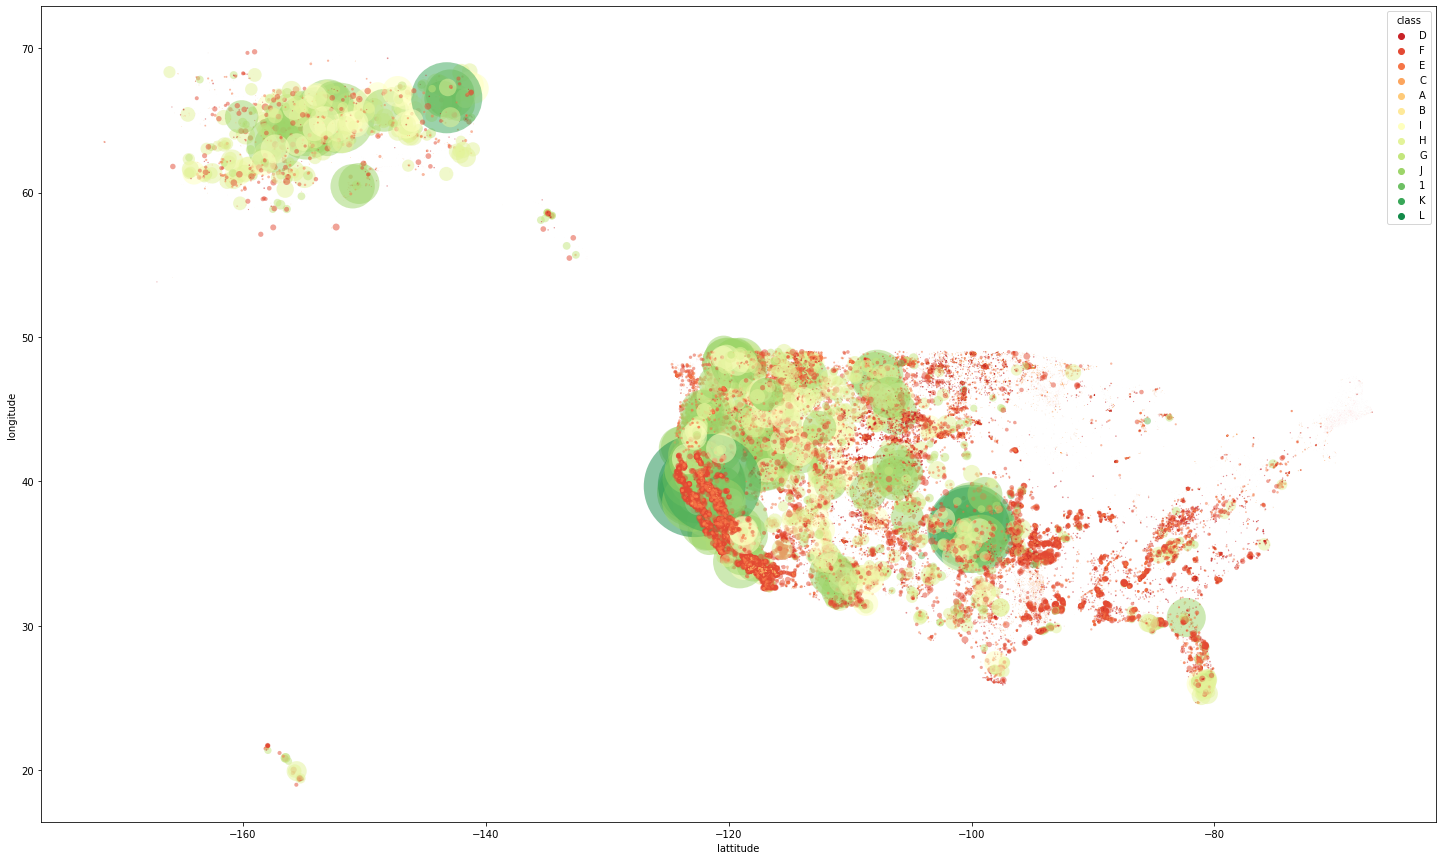

In [25]:
plt.figure(figsize=(25,15))
sns.scatterplot(x='lattitude', y='longitude', hue='class',alpha=.5, palette='RdYlGn', edgecolor=None, data=df, s = df['acres_burned']/100 );


In [19]:
over_300 = df.loc[df['acres_burned']>=299]
over_300

,unique_fire_identifier,lattitude,longitude,acres_burned,fire_cause,IsFSAssisted,origin_county,state,year,month,...,population,d0,d1,d2,d3,d4,DSCI_avg,DSCI_summed,precipitation(in),class
1,2004-CABDU-006784,-117.076679,34.733894,1906.698008,Unknown,1.0,San Bernardino,CA,2004,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
2,2008-IDGBK-000002,-116.216680,43.666673,685.728842,Unknown,1.0,Ada,ID,2008,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E
5,2009-TXAMD-000013,-101.958108,35.416704,2400.000000,Unknown,0.0,Potter,TX,2009,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
12,2009-COMVP-000012,-108.416011,37.274306,343.797119,Unknown,0.0,Montezuma,CO,2009,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E
13,2009-COSJD-000019,-106.866106,37.002207,488.450107,Unknown,0.0,Archuleta,CO,2009,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213618,2022-NMROD-000103,-104.363409,33.269455,1893.000000,Undetermined,1.0,Chaves,NM,2022,4,...,NaN,1.06,7.38,44.30,41.17,6.03,519.25,519.25,NaN,F
213632,2022-OKOKS-220715,-100.490842,36.992228,20000.000000,Undetermined,0.0,Beaver,OK,2022,4,...,NaN,9.74,16.00,29.40,22.12,8.97,329.02,329.02,NaN,H
213638,2022-LALAS-000138,-93.515007,30.394728,500.000000,Undetermined,0.0,Calcasieu,LA,2022,4,...,NaN,7.91,28.76,24.14,31.01,0.00,416.94,416.94,NaN,E
213681,2022-TXTXS-222445,-100.056953,35.444728,8152.000000,Undetermined,0.0,Wheeler,TX,2022,4,...,NaN,10.32,13.28,30.88,30.79,9.78,406.63,406.63,NaN,G


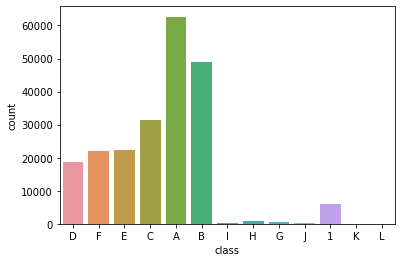

In [20]:
sns.countplot(x='class',data = df);

In [21]:
df.groupby('class')['precipitation(in)'].mean()

class
1    0.048707
A    0.051376
B    0.062199
C    0.065931
D    0.060275
E    0.052495
F    0.021581
G    0.053468
H    0.038148
I    0.025335
J    0.025651
K    0.058753
L    0.001857
Name: precipitation(in), dtype: float64

In [22]:
df.groupby('class')['DSCI_avg'].mean()

class
1    159.830073
A    175.701765
B    159.585102
C    170.303196
D    174.371133
E    186.631291
F    208.041486
G    167.185289
H    166.099168
I    167.303092
J    205.663785
K    237.842000
L    167.617500
Name: DSCI_avg, dtype: float64